#       IMPLEMENTATION OF PERCEPTRON


##                     AMISHA SINGH

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

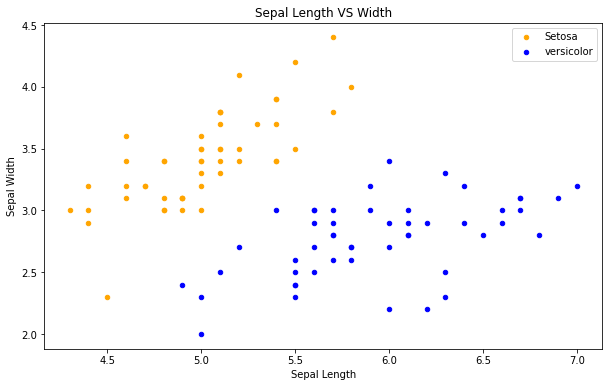

In [58]:
iris = pd.read_csv(r"C:\Users\Admin\Desktop\Iris.csv")
iris.drop('Id',axis=1,inplace=True)
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

We can see that the data is linearly seperable. Now we will use Perceptron Algorithm to classify the two classes.

In [59]:
y = iris.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
# sepal width and petal width
X = iris.iloc[0:100, [1,3]].values

Now build the algorithm.

In [60]:
class perceptron(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta # Learning rate
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Weights: [-0.4  -0.68  1.82]


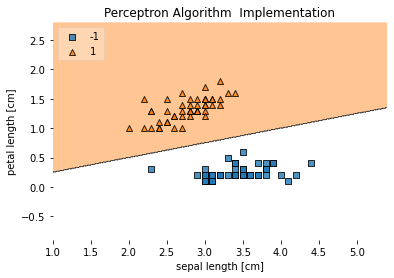

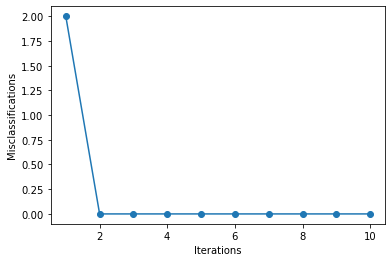

In [57]:
model = perceptron(epochs=10, eta=0.1)
model.train(X, y)
print('Weights: %s' % ppn.w_)
plot_decision_regions(X, y, clf=model, legend=2)
plt.title('Perceptron Algorithm  Implementation')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()
plt.plot(range(1, len(model.errors_)+1), model.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

The perceptron converges after the 2nd iteration and separates the two flower classes perfectly.